In [8]:
import tensorflow as tf

In [9]:
hello = tf.constant("Hello, TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


# Computational Graph

In [10]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [11]:
print("node1:", node1, "node2:", node2)
print("node3: ", node3)


node1: Tensor("Const_4:0", shape=(), dtype=float32) node2: Tensor("Const_5:0", shape=(), dtype=float32)
node3:  Tensor("Add_2:0", shape=(), dtype=float32)


In [12]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]) )
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


# Placeholder

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1,3], b: [2,4]}))

7.5
[3. 7.]


# lab 02 TensorFlow로 간단한 linear regression 구현

In [14]:
import tensorflow as tf

x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train*W + b

In [15]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# GradientDescent

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step%20==0:
        print(step, sess.run(cost), sess.run(W), sess.run(b) )

0 17.420603 [-0.68606687] [-0.56809336]
20 0.16067691 [0.78456527] [0.07068123]
40 0.0039356058 [0.92717737] [0.12564096]
60 0.0022869457 [0.94321513] [0.12528582]
80 0.0020653685 [0.947085] [0.11992629]
100 0.0018756945 [0.94968617] [0.11434054]
120 0.0017035339 [0.9520617] [0.10897176]
140 0.0015471826 [0.95431566] [0.10385094]
160 0.0014051736 [0.9564627] [0.09897039]
180 0.0012762047 [0.95850885] [0.09431915]
200 0.0011590678 [0.96045876] [0.0898865]
220 0.0010526829 [0.96231705] [0.08566217]
240 0.0009560634 [0.96408796] [0.08163638]
260 0.0008683132 [0.9657757] [0.07779981]
280 0.00078861736 [0.96738416] [0.07414352]
300 0.00071622996 [0.968917] [0.07065907]
320 0.00065049704 [0.9703778] [0.0673383]
340 0.0005907851 [0.9717699] [0.06417361]
360 0.00053656317 [0.97309667] [0.06115768]
380 0.00048731422 [0.974361] [0.05828348]
400 0.00044258704 [0.97556597] [0.05554436]
420 0.00040196444 [0.97671425] [0.05293397]
440 0.00036506995 [0.9778086] [0.05044628]
460 0.00033156367 [0.97885

In [19]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                feed_dict = {X: [1,2,3], Y:[1,2,3]})
    if step %20 ==0:
        print(step, cost_val, W_val, b_val)

0 2.0013276e-07 [0.99948156] [0.00117842]
20 1.8182506e-07 [0.9995058] [0.00112308]
40 1.6518585e-07 [0.999529] [0.00107036]
60 1.5003332e-07 [0.9995511] [0.00102012]
80 1.3627489e-07 [0.9995722] [0.00097223]
100 1.2374132e-07 [0.99959236] [0.00092661]
120 1.1241914e-07 [0.99961144] [0.00088315]
140 1.02133065e-07 [0.9996296] [0.00084169]
160 9.273612e-08 [0.999647] [0.00080216]
180 8.427921e-08 [0.9996637] [0.00076455]
200 7.65327e-08 [0.9996793] [0.00072867]
220 6.950872e-08 [0.9996944] [0.00069445]
240 6.315771e-08 [0.9997087] [0.00066193]
260 5.7390043e-08 [0.99972236] [0.00063086]
280 5.2124303e-08 [0.9997355] [0.0006013]
300 4.738017e-08 [0.99974775] [0.00057307]
320 4.302221e-08 [0.9997597] [0.00054625]
340 3.9068393e-08 [0.9997709] [0.00052058]
360 3.551359e-08 [0.9997816] [0.00049623]
380 3.223968e-08 [0.9997919] [0.00047292]
400 2.9319338e-08 [0.9998015] [0.00045081]
420 2.6619494e-08 [0.99981105] [0.0004297]
440 2.4164763e-08 [0.99981976] [0.00040951]
460 2.1984127e-08 [0.99

In [27]:
W = tf.Variable(tf.random_normal([1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name = 'bias'))
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X*W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                        feed_dict= {X:[1,2,3,4,5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step %20 == 0:
        print( step, cost_val, W_val, b_val)


print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

0 39.073486 [-0.21399465] [0.2880854]
20 0.032028783 [1.1083122] [0.68549436]
40 0.027275458 [1.1068323] [0.71419567]
60 0.02381984 [1.099861] [0.7394694]
80 0.020802012 [1.0933212] [0.7630808]
100 0.018166596 [1.0872095] [0.7851458]
120 0.015865024 [1.0814981] [0.80576587]
140 0.0138550475 [1.0761608] [0.8250355]
160 0.012099708 [1.071173] [0.84304315]
180 0.010566778 [1.0665118] [0.8598714]
200 0.0092280395 [1.0621557] [0.8755976]
220 0.008058916 [1.0580852] [0.89029396]
240 0.0070379116 [1.0542811] [0.9040277]
260 0.00614627 [1.0507262] [0.916862]
280 0.0053675813 [1.0474042] [0.92885584]
300 0.0046875468 [1.0442996] [0.94006425]
320 0.004093668 [1.0413985] [0.9505386]
340 0.0035750244 [1.0386871] [0.96032697]
360 0.0031220973 [1.0361536] [0.96947426]
380 0.0027265437 [1.0337858] [0.9780225]
400 0.002381118 [1.031573] [0.9860109]
420 0.0020794456 [1.0295054] [0.99347615]
440 0.0018159968 [1.0275731] [1.0004525]
460 0.0015859182 [1.0257673] [1.0069718]
480 0.0013850005 [1.0240797] [1

In [26]:
print(sess.run(hypothesis, feed_dict={X:[5]}))

[1.0044961 2.0009649 2.9974334]


# lab 03 - Linear Regression의 cost 최소화의 TensorFlow 구현

In [29]:
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
#Our hypothesis for linear model X*W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))
sess=tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i *0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)


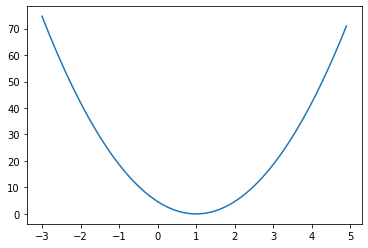

In [30]:
import matplotlib.pyplot as plt
plt.plot(W_val, cost_val)
plt.show()

In [32]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name= 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X*W

cost = tf.reduce_sum(tf.square(hypothesis-Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 1.6534402 [1.343661]
1 0.47031188 [1.1832858]
2 0.13377751 [1.0977525]
3 0.038052317 [1.0521346]
4 0.010823723 [1.0278051]
5 0.0030787543 [1.0148294]
6 0.0008757451 [1.007909]
7 0.00024911042 [1.0042182]
8 7.085722e-05 [1.0022497]
9 2.0155532e-05 [1.0011998]
10 5.7328853e-06 [1.0006399]
11 1.6305191e-06 [1.0003413]
12 4.6377187e-07 [1.000182]
13 1.3182478e-07 [1.000097]
14 3.7473797e-08 [1.0000517]
15 1.0596594e-08 [1.0000275]
16 2.999471e-09 [1.0000147]
17 8.6663476e-10 [1.0000079]
18 2.407461e-10 [1.0000042]
19 7.021583e-11 [1.0000023]
20 1.9895197e-11 [1.0000012]


In [35]:
X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(-3.0)

hypothesis = X*W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [50]:
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
   print(step, sess.run([gradient, W, gvs]))
   sess.run(apply_gradients)


0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [

# lab 04 multi-variable linear regression

In [41]:
x1_data=[73., 93., 89., 96., 73.]
x2_data=[80., 88., 91., 98., 66.]
x3_data=[75., 93., 90., 100., 70.]
y_data=[152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x1*w1 + x2*w2 + x3*w3 +b

cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step %10 ==0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  31725.275 
Prediction:
 [-12.616561    -1.4282908   -8.788703    -5.93383     -0.66677046]
10 Cost:  13.588652 
Prediction:
 [144.92728 187.90367 177.77586 197.228   143.74178]
20 Cost:  13.24246 
Prediction:
 [145.41664 188.46794 178.34435 197.84476 144.16812]
30 Cost:  13.186864 
Prediction:
 [145.43077 188.46104 178.35002 197.84868 144.15886]
40 Cost:  13.131579 
Prediction:
 [145.44342 188.45247 178.35402 197.85072 144.1483 ]
50 Cost:  13.076581 
Prediction:
 [145.45604 188.44391 178.358   197.85277 144.13777]
60 Cost:  13.021894 
Prediction:
 [145.46863 188.43538 178.36195 197.85481 144.12727]
70 Cost:  12.967445 
Prediction:
 [145.48119 188.42686 178.36594 197.85686 144.11679]
80 Cost:  12.913351 
Prediction:
 [145.49368 188.41837 178.36986 197.85886 144.10634]
90 Cost:  12.8595 
Prediction:
 [145.50616 188.40988 178.3738  197.86087 144.09593]
100 Cost:  12.805986 
Prediction:
 [145.5186  188.40144 178.37772 197.86287 144.08554]
110 Cost:  12.752649 
Prediction:
 [145.53

960 Cost:  9.1109705 
Prediction:
 [146.47559 187.75253 178.68004 198.01076 143.29376]
970 Cost:  9.077057 
Prediction:
 [146.4855  187.74585 178.6832  198.01222 143.28566]
980 Cost:  9.043322 
Prediction:
 [146.49539 187.73917 178.68633 198.01369 143.27757]
990 Cost:  9.009756 
Prediction:
 [146.50523 187.73247 178.68945 198.01514 143.2695 ]
1000 Cost:  8.976351 
Prediction:
 [146.51506 187.72581 178.69257 198.01656 143.26144]
1010 Cost:  8.943127 
Prediction:
 [146.52487 187.7192  178.69568 198.01799 143.25342]
1020 Cost:  8.910062 
Prediction:
 [146.53465 187.71255 178.69878 198.01942 143.24542]
1030 Cost:  8.8772 
Prediction:
 [146.54439 187.70595 178.70186 198.02083 143.23743]
1040 Cost:  8.844511 
Prediction:
 [146.55412 187.69937 178.70494 198.02226 143.22949]
1050 Cost:  8.8119545 
Prediction:
 [146.56383 187.6928  178.70802 198.02368 143.22154]
1060 Cost:  8.779563 
Prediction:
 [146.5735  187.68623 178.71109 198.02507 143.21362]
1070 Cost:  8.747401 
Prediction:
 [146.58315 1

1950 Cost:  6.476719 
Prediction:
 [147.34106 187.1673  178.9555  198.13026 142.59308]
1960 Cost:  6.4563804 
Prediction:
 [147.34871 187.16212 178.95793 198.13124 142.58696]
1970 Cost:  6.4360743 
Prediction:
 [147.35637 187.15697 178.96039 198.13222 142.58087]
1980 Cost:  6.415961 
Prediction:
 [147.36395 187.15182 178.96281 198.13316 142.57478]
1990 Cost:  6.395886 
Prediction:
 [147.37158 187.14671 178.96526 198.13416 142.56876]
2000 Cost:  6.3759565 
Prediction:
 [147.37914 187.14159 178.96767 198.1351  142.5627 ]


In [45]:
x_data=[[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data=[[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

w = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,w) + b

cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step %10 ==0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  14362.208 
Prediction:
 [[41.883358]
 [59.343464]
 [54.06951 ]
 [56.526466]
 [49.347702]]
10 Cost:  9.632287 
Prediction:
 [[147.87381]
 [186.71507]
 [179.58183]
 [193.20546]
 [146.49557]]
20 Cost:  9.454999 
Prediction:
 [[148.20554]
 [187.09285]
 [179.9649 ]
 [193.62186]
 [146.77914]]
30 Cost:  9.409311 
Prediction:
 [[148.21756]
 [187.08641]
 [179.96938]
 [193.62599]
 [146.76967]]
40 Cost:  9.363907 
Prediction:
 [[148.22855]
 [187.0788 ]
 [179.9727 ]
 [193.62881]
 [146.75931]]
50 Cost:  9.318708 
Prediction:
 [[148.23953]
 [187.07121]
 [179.976  ]
 [193.63167]
 [146.749  ]]
60 Cost:  9.273778 
Prediction:
 [[148.2505 ]
 [187.06369]
 [179.9793 ]
 [193.6345 ]
 [146.73871]]
70 Cost:  9.229073 
Prediction:
 [[148.26141]
 [187.05617]
 [179.98259]
 [193.63736]
 [146.72844]]
80 Cost:  9.184634 
Prediction:
 [[148.2723 ]
 [187.04865]
 [179.98586]
 [193.64017]
 [146.7182 ]]
90 Cost:  9.140413 
Prediction:
 [[148.28314]
 [187.04117]
 [179.98914]
 [193.64299]
 [146.70798]]
100 Cost: 

1180 Cost:  5.500247 
Prediction:
 [[149.30367]
 [186.3366 ]
 [180.29549]
 [193.91353]
 [145.74217]]
1190 Cost:  5.475715 
Prediction:
 [[149.31168]
 [186.33107]
 [180.29788]
 [193.91573]
 [145.73454]]
1200 Cost:  5.4513 
Prediction:
 [[149.31969]
 [186.32553]
 [180.30026]
 [193.91788]
 [145.72693]]
1210 Cost:  5.4270434 
Prediction:
 [[149.32765]
 [186.32005]
 [180.30266]
 [193.92004]
 [145.71933]]
1220 Cost:  5.4028788 
Prediction:
 [[149.33559]
 [186.31453]
 [180.30502]
 [193.92221]
 [145.71175]]
1230 Cost:  5.3788843 
Prediction:
 [[149.3435 ]
 [186.30907]
 [180.30739]
 [193.92436]
 [145.7042 ]]
1240 Cost:  5.3549905 
Prediction:
 [[149.35141]
 [186.30362]
 [180.30977]
 [193.92653]
 [145.69666]]
1250 Cost:  5.331224 
Prediction:
 [[149.3593 ]
 [186.29816]
 [180.31213]
 [193.92868]
 [145.68915]]
1260 Cost:  5.3075933 
Prediction:
 [[149.36714]
 [186.29272]
 [180.31447]
 [193.93082]
 [145.68164]]
1270 Cost:  5.284095 
Prediction:
 [[149.37497]
 [186.28732]
 [180.31682]
 [193.93294]
 

# lab 04-2 파일에서 데이터 읽어오기

In [49]:
filename_queue = tf.train.string_input_producer(['data-01-test-score.csv'], shuffle = False, name = 'filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.],[0.],[0.]]
xy = tf.decode_csv(value, record_defaults = record_defaults)

train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size = 10)

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean =(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess, coord = coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict = {X: x_batch, Y: y_batch} )
    if step % 10 == 0 :
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
        
coord.request_stop()
coord.join(threads)

ValueError: Shape must be rank 2 but is rank 0 for 'MatMul_7' (op: 'MatMul') with input shapes: [?,3], [].